
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
  car  cartruck ship


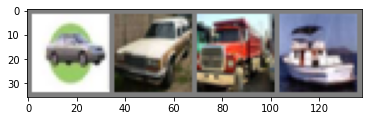

In [1]:
%matplotlib inline 
import torch 
import torchvision 
import torchvision.transforms as transforms
transform = transforms.Compose(
  [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 데이터를 텐서로 만든다. 표준화(평균, 표준편차)
                                                                                    # R,G,B[0,1]->[-1,1]
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) # 학습 데이터 셋 가져오기
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)# 학습 데이터 로드. 셔플.

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform) # 테스트 데이터 셋 가져오기
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2) # 테스트 데이터 롣,. 셔플 안함.

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') # 클래스 이름들

import matplotlib.pyplot as plt 
import numpy as np

def imshow(img): # 이미지 보여주기
  img = img / 2 + 0.5 # unnormalize. 원래 값 [0,1]
  npimg = img.numpy() # 넘파이로
  plt.imshow(np.transpose(npimg, (1, 2, 0))) # 이미지 보여주기

dataiter = iter(trainloader) # 트레인 데이터에서 덩어리 객체
images, labels = dataiter.next() # 한 덩어리의 이미지 

imshow(torchvision.utils.make_grid(images)) # 이미지 출력
print(''.join('%5s' % classes[labels[j]] for j in range(4)))

In [2]:
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module): 
  def __init__(self):
    super(Net, self).__init__()# 초기화
    # 컨볼루션
    self.conv1 = nn.Conv2d(3, 6, 5) # 3채널, 6개, 5x5
    self.pool = nn. MaxPool2d(2, 2) # 2x2 맥스 풀링
    self.conv2 = nn.Conv2d(6, 16, 5) # 6채널, 16개, 5x5
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # 입력,출력
    self.fc2 = nn.Linear(120, 84)  # 입력,출력
    self.fc3 = nn.Linear(84, 10) # 입력,출력

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x))) # 위의 3채널짜리를 relu하고 pool
    x = self.pool(F.relu(self.conv2(x))) # 위의 6채널짜리를 relu하고 pool
    x = x.view(-1, 16 * 5 * 5) # reshape
    x = F.relu(self.fc1(x)) #120개 relu
    x = F.relu(self.fc2(x)) #84개 relu
    x = self.fc3(x) 
    return x

net = Net() # 네트워크

import torch.optim as optim

criterion = nn.CrossEntropyLoss() # 손실함수
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # 옵티마이저 SGD 사용

for epoch in range(10):

  running_loss = 0.0 
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data # 학습데이터
    optimizer.zero_grad() # 그레디언트 초기화
    outputs = net(inputs) # 포워드 계산
    loss = criterion(outputs, labels) # 크로스 엔트로피
    loss.backward() # 그레디언트 계산
    optimizer.step() # 가중치 조정 학습

    running_loss += loss.item() 
    if i % 2000 == 1999: # 매 2000 미니배치 별로 출력
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000)) 
        running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.163
[1,  4000] loss: 1.835
[1,  6000] loss: 1.665
[1,  8000] loss: 1.586
[1, 10000] loss: 1.514
[1, 12000] loss: 1.473
[2,  2000] loss: 1.385
[2,  4000] loss: 1.360
[2,  6000] loss: 1.340
[2,  8000] loss: 1.304
[2, 10000] loss: 1.286
[2, 12000] loss: 1.272
[3,  2000] loss: 1.199
[3,  4000] loss: 1.223
[3,  6000] loss: 1.192
[3,  8000] loss: 1.171
[3, 10000] loss: 1.176
[3, 12000] loss: 1.191
[4,  2000] loss: 1.087
[4,  4000] loss: 1.112
[4,  6000] loss: 1.124
[4,  8000] loss: 1.115
[4, 10000] loss: 1.116
[4, 12000] loss: 1.087
[5,  2000] loss: 1.000
[5,  4000] loss: 1.034
[5,  6000] loss: 1.037
[5,  8000] loss: 1.052
[5, 10000] loss: 1.045
[5, 12000] loss: 1.070
[6,  2000] loss: 0.970
[6,  4000] loss: 0.963
[6,  6000] loss: 0.971
[6,  8000] loss: 1.001
[6, 10000] loss: 0.999
[6, 12000] loss: 1.014
[7,  2000] loss: 0.913
[7,  4000] loss: 0.932
[7,  6000] loss: 0.948
[7,  8000] loss: 0.952
[7, 10000] loss: 0.949
[7, 12000] loss: 0.944
[8,  2000] loss: 0.856
[8,  4000] 

Ground Truth:    cat ship shipplane
Predicted:   cat shiptruck ship
Accuracy of the network on the 10000 test images: 61 %


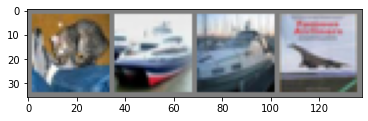

In [3]:
# 4개의 데이터 뭉텅이 가져옴
dataiter = iter(testloader) 
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid (images)) # 그려주기
print('Ground Truth: ', ''.join('%5s' % classes[labels[j]] for j in range(4))) # 클래스가 뭔지

outputs = net(images) # 네개 이미지에 대해 출력값을 얻는다
_, predicted = torch.max(outputs, 1) # 예측값
print('Predicted:', ''.join('%5s' % classes[predicted[j]] for j in range(4))) # 예측값 클래스 출력

correct = 0 # 맞은거 초기화
total = 0 # 전체 초기화
with torch.no_grad(): # 그레디언트 안함
  for data in testloader:
    images, labels = data 
    outputs = net(images) # 모델에 적용
    _,predicted = torch.max(outputs.data, 1) # 최대값
    total += labels.size(0) 
    correct += (predicted == labels).sum().item() # 에측

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

In [4]:
# 클래스 별로
class_correct = list(0. for i in range(10)) 
class_total = list(0. for i in range(10)) 

with torch.no_grad(): # 그레디언트 안함
  for data in testloader:
    images, labels = data 
    outputs = net(images) # 모델에 적용
    _, predicted = torch.max(outputs, 1) # 최대값
    c = (predicted == labels).squeeze() # 에측
    for i in range(4):
      label = labels[i] 
      class_correct[label] += c[i].item() 
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] /class_total[i]))

Accuracy of plane : 54 %
Accuracy of   car : 75 %
Accuracy of  bird : 54 %
Accuracy of   cat : 37 %
Accuracy of  deer : 56 %
Accuracy of   dog : 47 %
Accuracy of  frog : 73 %
Accuracy of horse : 65 %
Accuracy of  ship : 83 %
Accuracy of truck : 67 %


In [5]:
# AlexNet을 이용한 전이 학습
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url
import torchvision
from torchvision import utils
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

__all__ = ['AlexNet', 'alexnet']
model_urls = {
'alexnet': 'https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth',
}

# imagenet-small 폴더를 github에서 다운로드 한다.
!git clone https://github.com/jlee581/imagenet-small.git

# ImageNet에서 10개의 클래스를 뽑아서 만든 imagenette
# training set이 9469개의 이미지, test set이 3925개의 이미지로 구성되어 2GB
# 각 class에서 100개의 이미지만 뽑아서 사용

Cloning into 'imagenet-small'...
remote: Enumerating objects: 10495, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 10495 (delta 0), reused 1 (delta 0), pack-reused 10494
Receiving objects: 100% (10495/10495), 256.70 MiB | 44.12 MiB/s, done.
Checking out files: 100% (10469/10469), done.


In [6]:
class ImageNetSubset(Dataset): # 이미지 가져와서 쓸 수 있게
  def __init__(self, data_dir): 
    self.transform = transforms.Compose(# 전처리 클래스
        [transforms.Resize(256), # 이미지 크기
        transforms.CenterCrop(224), # 224로 자르기
        transforms.ToTensor(), # 텐서 객체로 만든다
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) # 정규화
    self.data_dir = data_dir 
     # Image Folder = 7TIE 2 901 EC 2700171 UE U TE0E 401 ICH. 
     # 각 subfolder는 하나의 class를 의미한다. class label은 0부터 자동으로 index 된다. 
    self.data_set = torchvision.datasets.ImageFolder(root = self.data_dir, transform=self.transform)

  def __len__(self):
    return len(self.data_set) # 이미지 개수

  def __getitem__(self,idx):
    data = self.data_set[idx] 
    image = data[0] # 이미지
    label = data[1]# 레이블

# Label mapping에는 다음 링크 참고. class 이름을 보고 이에 대응하는 class index를 찾는다. 
# https://github.com/Cadene/pretrained-models.pytorch/blob/master/data/imagenet_classes.txt 
# https://github.com/Cadene/pretrained-models.pytorch/blob/master/data/imagenet_synsets.txt
    label_dict = {0: 0, 1: 217, 2: 482, 3: 491, 4: 497,
                5: 566, 6: 569, 7: 571, 8: 574, 9: 701} 
    label = label_dict[label] 
    return {"input": image,
            "label": label}



Size of dataset: 1000


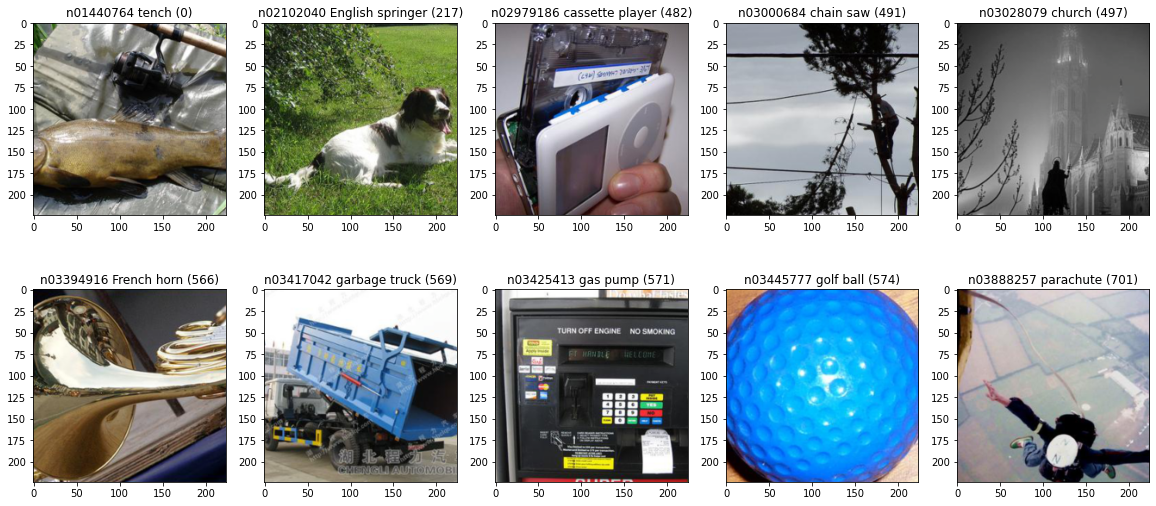

In [8]:
test_dir = './imagenet-small/test' # 디렉토리 안에 데이터가 있음
testset = ImageNetSubset(test_dir) # 테스트 셋으로 이미지 읽기
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2) # 4로 읽어들이기
print("Size of dataset: %d" % len(testset))

def imshow(im): 
  mean = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32) # 평균
  std = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32) # 표준편차

  inverse_normalize = transforms. Normalize((-mean / std).tolist(), (1.0 / std).tolist()) # 원래대로 이미지 만들기
  output = inverse_normalize(im).numpy()
  output = np.clip(output, 0, 1) 
  plt.imshow(np.transpose(output, (1, 2, 0)))

label_list = ['n01440764 tench (0)', 'n02102040 English springer (217)', 'n02979186 cassette player (482)',
          'n03000684 chain saw (491)', 'n03028079 church (497)', 'n03394916 French horn (566)', 
          'n03417042 garbage truck (569)', 'n03425413 gas pump (571)', 'n03445777 golf ball (574)',
          'n03888257 parachute (701)'] # 10개 이미지 레이블

fig = plt.figure(figsize=(20, 9)) 
for ix in range(10): 
  data = testset[ix*100] #테스트셋은 이미지들이 순차적으로 정렬된 testloader는 랜덤
  inputs = data['input'] # 데이터 이미지
  labels = label_list[ix] # data['label']  
  ax = fig.add_subplot(2, 5, ix+1) 
  ax.set_title(labels) 
  imshow(inputs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([4, 3, 224, 224]) torch.Size([4])


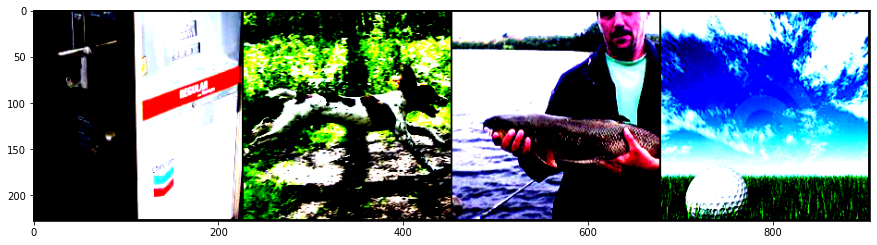

tensor([571, 217,   0, 574])


In [9]:
for i, sample in enumerate(testloader): # 배치 사이즈. 현재 4
  print(i, sample['input'].size(), sample['label'].size()) # 출력

  # 이제 batch를 visualize 해보자. 
  # 현재 transformation apply된 이후이므로 image가 좀 이상하게 보일 것이다. 
  inputs, labels = sample['input'], sample['label'] 
  plt.figure(figsize=(15, 5)) # 가로 세로
  grid = utils.make_grid(inputs) # 그리드 만들기
  plt.imshow(grid.numpy( ).transpose((1, 2, 0))) 
  plt.show() 
  print(labels) 
  break

In [11]:
class AlexNet(nn. Module): 
  def __init__(self, num_classes=1000):
    super(AlexNet, self).__init__() 
    self.features = nn. Sequential(
        #컨볼루션
      nn.Conv2d(3, 64, kernel_size=11, stride =4, padding=2), # 입력3, 출력64, 커널, 스트라이드, 패딩
      nn.ReLU (inplace=True), # relu
      nn.MaxPool2d(kernel_size=3, stride=2), # 맥스풀링
      nn.Conv2d(64, 192, kernel_size=5, padding=2), # 입력64, 출력192, 커널, 스트라이드, 패딩
      nn.ReLU(inplace=True), # relu
      nn.MaxPool2d(kernel_size=3, stride=2),  # 맥스풀링
      nn.Conv2d(192, 384, kernel_size=3, padding=1), # 입력192, 출력384, 커널, 스트라이드, 패딩
      nn.ReLU(inplace=True), # relu
      nn.Conv2d(384, 256, kernel_size=3, padding=1), # 입력384, 출력256, 커널, 스트라이드, 패딩
      nn.ReLU(inplace=True), # relu
      nn.Conv2d(256, 256, kernel_size=3, padding=1), # 입력256, 출력256, 커널, 스트라이드, 패딩
      nn.ReLU(inplace=True),# relu
      nn.MaxPool2d(kernel_size=3, stride=2), )  # 맥스풀링
    self.avgpool = nn.AdaptiveAvgPool2d((6, 6)) 
    self.classifier = nn.Sequential( # 순차적으로 드롭아웃 relu linear 반복
      nn.Dropout(), 
      nn.Linear(256 * 6 * 6, 4096), 
      nn.ReLU(inplace=True), 
      nn.Dropout(), 
      nn.Linear(4096, 4096), 
      nn.ReLU(inplace=True),
      nn.Linear(4096, num_classes), ) #클래스 개수 1000
      
  def forward(self,x):
      x = self.features(x)
      x = self.avgpool(x) 
      x = torch.flatten(x, 1) # 1차원으로
      x = self.classifier(x) 
      return x

In [12]:
  def alexnet(pretrained=False, progress=True, **kwargs):
    model = AlexNet(**kwargs) # 알렉사넷 구조 만들기
    if pretrained:
      state_dict = load_state_dict_from_url(model_urls['alexnet'], progress=progress) # 모델이 학습된 곳을 url가져옴
      model.load_state_dict(state_dict) # 가져온 파라미터 적용
    return model

  model = alexnet(pretrained = True) # 모델이 만들어짐
  print(model)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth



AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)


In [13]:
assert torch.cuda.is_available()
model.cuda() # 쿠다

total = 0 # 전체개수
correct_class = np.zeros(10) # 10개 부류 
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2) # 데이터 가져오기 
label_reverse_dict = {0:0, 217: 1, 482: 2, 491: 3, 497: 4,
              566: 5, 569: 6, 571: 7, 574: 8, 701: 9}

with torch.no_grad(): # 모델 평가
  for data in testloader: # 데이터 가져오기
    inputs, labels = data['input'], data['label'] 
    inputs = inputs.cuda()# 가져온 데이터 쿠다로 처리
    labels = labels.cuda() 
    outputs = model(inputs) # 모델 적용
    _, predicted = torch.max(outputs.data, 1) # 최대값 선택
    total += labels.size(0) 
    #correct += (predicted == labels).sum().item() 
    class_ix = label_reverse_dict[labels.item()] 
    if predicted == labels: # 예측값과 비교해서
      correct_class[class_ix] += 1 # 1증가

correct = sum(correct_class) # 합
print('Accuracy of the network on the test set: %d %%' % (100 * correct / total)) # 정확도
print(total) 
print(correct)
print(correct_class)

Accuracy of the network on the test set: 68 %
1000
688.0
[84. 69. 46. 49. 55. 84. 79. 58. 81. 83.]


In [14]:
# fine tuning 
train_dir = './imagenet-small/train' # 학습 데이터

train_set = ImageNetSubset(train_dir) # 학습 데이터 읽어들임
trainloader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle = True, num_workers=2)# 학습 데이터 가져오기
print("Training set size: %d" % len(train_set)) # 학습 데이터 크기

assert torch.cuda.is_available() 
model.cuda() 
criterion = nn.CrossEntropyLoss() # 손실함수
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0005) # 옵티마이저 SGD

for epoch in range(2):
    running_loss = 0.0 
    for i, data in enumerate(trainloader, 0):# 데이터 가져오기
      inputs, labels = data['input'], data['label'] 
      inputs = inputs.cuda() # 가져온 데이터 쿠다로 처리
      labels = labels.cuda() # 가져온 레이블 쿠다로 처리
      optimizer.zero_grad() # 그레디언트 초기화
      outputs = model(inputs) # 모델 적용
      loss = criterion(outputs, labels) 
      loss.backward() # 그레디언트 계산
      optimizer.step() # 그레디언트 업데이트
      running_loss += loss.item() # 손실 정보
      if i % 100 == 99:
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
        running_loss = 0.0 
print('Finished Training')        

Training set size: 9469
[1,   100] loss: 0.624
[1,   200] loss: 0.271
[1,   300] loss: 0.179
[1,   400] loss: 0.172
[1,   500] loss: 0.164
[2,   100] loss: 0.102
[2,   200] loss: 0.126
[2,   300] loss: 0.064
[2,   400] loss: 0.089
[2,   500] loss: 0.100
Finished Training


In [15]:
# 학습 후 모델 평가
assert torch.cuda.is_available() 
model.cuda() 

total = 0 
correct_class = np.zeros(10) 
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle = True, num_workers=2) # 테스트 데이터 로드
label_reverse_dict = {0:0, 217: 1, 482: 2, 491: 3, 497: 4, 566: 5, 569: 6, 571: 7, 574: 8, 701: 9}

with torch.no_grad(): 
  for data in testloader:# 데이터 가져오기
    inputs, labels = data['input'], data['label'] 
    inputs = inputs.cuda()  # 가져온 데이터 쿠다로 처리
    labels = labels.cuda() # 가져온 레이블 쿠다로 처리
    outputs = model(inputs)# 모델 적용
    _,predicted = torch.max(outputs.data, 1) 
    total += labels.size(0) 
    #correct += (predicted == labels).sum().item() 
    class_ix = label_reverse_dict[labels.item()] 
    if predicted == labels: # 예측과 실제 레이블 비교
      correct_class[class_ix] += 1 # 카운트 1증가

correct = sum(correct_class) 
print('Accuracy of the network on the test set: %d %%' % (100 * correct / total)) # 정확도
print(total) 
print(correct)
print(correct_class)

Accuracy of the network on the test set: 96 %
1000
963.0
[ 96.  99.  99.  93.  97.  96. 100.  88.  97.  98.]


In [ ]:
# ResNet을 이용한 전이 학습
%matplotlib inline 

from __future__ import print_function, division
import torch 
import torch.nn as nn 
import torch.optim as optim 
from torch.optim import lr_scheduler
import numpy as np 
import torchvision 
from torchvision import datasets, models, transforms 
import matplotlib.pyplot as plt 
import time 
import os 
import copy 
plt.ion() # interactive mode

from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
data_transforms = { # 전처리
    'train': transforms.Compose([ # 학습
        transforms.RandomResizedCrop(224), #224사이즈 자르기
        transforms.RandomHorizontalFlip( ), # 랜덤하게
        transforms.ToTensor(),# 텐서로
        transforms. Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화
    ]),
    'val': transforms.Compose([ # 테스트
        transforms.Resize(256), #256 사이즈
        transforms.CenterCrop(224), # 224 사이즈로 가운데 자르기
        transforms.ToTensor(),# 텐서로
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])# 정규화
    ]),
}

data_dir = '/content/drive/My Drive/hymenoptera_data' # 데이터 디렉토리
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) # 이미지 폴더 가져오기
                            for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle = True, # 데이터 가져오기. 딕셔너리 형태
                                    num_workers=4) for x in ['train', 'val']} 
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']} # 데이터 사이즈
class_names = image_datasets['train'].classes # 클래스 이름
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # gpu면 cuda:0, 아니면 cpu

In [ ]:
def imshow(inp, title=None): # 이미지 보여주기
  inp = inp.numpy().transpose((1, 2, 0)) 
  mean = np.array([0.485, 0.456, 0.406]) # 평균
  std = np.array([0.229, 0.224, 0.225]) # 표준편차
  inp = std * inp + mean  # 원래 이미지로 만들기
  inp = np.clip(inp, 0, 1) 
  plt.imshow(inp) 
  if title is not None:
      plt.title(title) 
      plt.pause(0.001)

inputs, classes = next(iter(dataloaders['train'])) # 학습 데이터의 4개 덩어리
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes]) # 이미지 출력

In [ ]:

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
  since = time.time() 
  best_model_wts = copy.deepcopy(model.state_dict()) # 현재 모델에 대한 정보를 복사해 저장
  best_acc = 0.0 
  
  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1)) # 몇번째 에폭인지 표시
    print('-'* 10)
    for phase in ['train', 'val']:
        if phase == 'train':# train이면
            scheduler.step() # 스케줄러가 단계별로 진행
            model.train() # 모델을 학습
        else: # val이면
          model.eval() # 모델을 eval
        running_loss = 0.0
        running_corrects=0
        for inputs, labels in dataloaders[phase]:# 데이터 가져옴
            inputs = inputs.to(device) # 쿠다에서 cpu, gpu 사용 정함
            labels = labels.to(device)
            optimizer.zero_grad() # 그레디언트 초기화
            with torch.set_grad_enabled(phase == 'train'): # 현재 모드가 train이면
                outputs = model(inputs) # 모델 적용
                _,preds = torch.max(outputs, 1) 
                loss = criterion(outputs, labels) # 손실함수 계산
                if phase == 'train':
                    loss.backward() # 그레디언트 계산
                    optimizer.step() # 조절
            running_loss += loss.item() * inputs.size(0) # 손실 정보
            running_corrects += torch.sum(preds == labels.data) # correct 정보
        epoch_loss = running_loss / dataset_sizes[phase] # 현재 에폭에서의 로스
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        
        print('{} Loss: {:.4f} Acc: {:.4f}'.format( 
            phase, epoch_loss, epoch_acc))
        if phase == 'val' and epoch_acc > best_acc: # val 단계(테스트). 현재>기존->더 좋은것을 찾음
            best_acc = epoch_acc # 베스트를 현재로 바꿈
            best_model_wts = copy.deepcopy(model.state_dict()) # 현재 모델에 대한 가중치를 복사 저장
    print()

  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(
      time_elapsed // 60, time_elapsed % 60))
  print('Best val Acc: {:4f}'.format(best_acc)) 
  model.load_state_dict(best_model_wts) # 가장 좋은 모델을 현재에 적재
  return model

In [ ]:
def visualize_model(model, num_images=6): # 모델을 보여줌
    was_training = model.training 
    model.eval() 
    images_so_far = 0 
    fig = plt.figure()

    with torch.no_grad(): 
      for i, (inputs, labels) in enumerate(dataloaders['val']): # 테스트 데이터에 대해 적용
        inputs = inputs.to(device) # 쿠다에서 cpu, gpu 사용 정함
        labels = labels.to(device)# 쿠다에서 cpu, gpu 사용 정함

        outputs = model(inputs) # 모델에 적용
        _,preds = torch.max(outputs, 1) # 최대값 선택
        
        for j in range(inputs.size()[0]):
            images_so_far += 1 
            ax = plt.subplot(num_images//2, 2, images_so_far) 
            ax.axis('off') 
            ax.set_title('predicted: {}'.format(class_names[preds[j]]))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                model.train(mode=was_training)
                return 
    model.train(mode=was_training)

In [ ]:
model_ft = models.resnet18(pretrained=True) # 사전 학습된 resnet18 가져오기
num_ftrs = model_ft.fc.in_features # 모델에서 feature extraction 후 fc 층에 입력되는 특징수
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device) # cpu나 gpu에 model_ft을 할당
criterion = nn.CrossEntropyLoss() # 손실함수

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9) # 모든 파라미터 학습

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1) # 매 7 에폭마다 학습율 0.1배 감소
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

In [ ]:
visualize_model(model_ft) # 모델에 대해 예측 된 결과 출력

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True) # 모델 가져옴
for param in model_conv.parameters( ):# 파라미터 지정됨
    param.requires_grad = False # 사전학습된 모델의 가중치를 상수로 고정

# 새로 생성된 모듈의 파라미터는 기본적으로 requires_grad=True
num_ftrs = model_conv.fc.in_features 
model_conv.fc = nn.Linear(num_ftrs, 2) # 2개

model_conv = model_conv.to(device)
criterion = nn.CrossEntropyLoss() # 손실함수

optimizer_conv = optim.SGD(model_conv.fc.parameters( ), lr=0.001, momentum=0.9) # 마지막 층 파라미터만 학습
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1) # 7 에폭마다 0.1씩 학습률 감소
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)

In [ ]:
# 학습된 모델에 대해 테스트 데이터 적용
visualize_model(model_conv)
plt.ioff( )
plt.show( )